# PROGRAM STATEMENT

Write a program to implement Agglomerative clustering 
to cluster the Mall-Customer data set.

# CODE

In [ ]:
# importing pandas libray for CSV file I/O
import pandas as pd
# Importing the dataset
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
print('First 5 rows of the dataset: ')
print(df.head())

First 5 rows of the dataset: 
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print('Shape of the Data frame: ', df.shape)

Shape of the Data frame:  (200, 5)


In [ ]:
print("The summary of dataset: ")
print(df.info())

The summary of dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
print("Check for missing values: ")
print(df.isnull().sum())

Check for missing values: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# There are no missing values in variables

In [ ]:
# Declaring the feature
import numpy as np
f2 = df['Annual Income (k$)'].values
f3 = df['Spending Score (1-100)'].values
X = np.array(list(zip(f2, f3)))

In [ ]:
# Importing the model
from sklearn.cluster import AgglomerativeClustering
# Instantiating the model
hc = AgglomerativeClustering(n_clusters = 3, 
                             affinity = 'euclidean', linkage = 'ward')
# Fitting the model
cluster_labels = hc.fit_predict(X)

In [ ]:
# Distribution of observations into clusters
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [ ]:
# Searching for Noise Points
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)

In [ ]:
print("Estimated number of clusters: " , n_clusters_)
print("Estimated number of noise points: " , n_noise_)

Estimated number of clusters:  3
Estimated number of noise points:  0


In [ ]:
# importing metrics to calculate silhouette score
from sklearn import metrics
sil = metrics.silhouette_score(X, cluster_labels, 
                               metric='euclidean',sample_size = len(df))
print("Quality of Clustering: ", sil)

Quality of Clustering:  0.4618340266628975


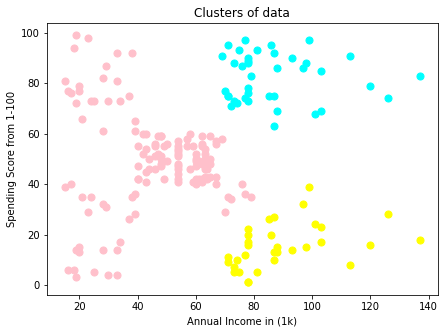

In [ ]:
# Plotting the clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], s = 50, c = 'pink')
plt.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], s = 50, c = 'yellow')
plt.scatter(X[cluster_labels == 2, 0], X[cluster_labels == 2, 1], s = 50, c = 'cyan')
plt.scatter(X[cluster_labels == 3, 0], X[cluster_labels == 3, 1], s = 50, c = 'magenta')
plt.scatter(X[cluster_labels == 4, 0], X[cluster_labels == 4, 1], s = 50, c = 'orange')
plt.scatter(X[cluster_labels == 5, 0], X[cluster_labels == 5, 1], s = 50, c = 'blue')
plt.scatter(X[cluster_labels == 6, 0], X[cluster_labels == 6, 1], s = 50, c = 'red')
plt.scatter(X[cluster_labels == 7, 0], X[cluster_labels == 7, 1], s = 50, c = 'black')
plt.scatter(X[cluster_labels == 8, 0], X[cluster_labels == 8, 1], s = 50, c = 'green')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()

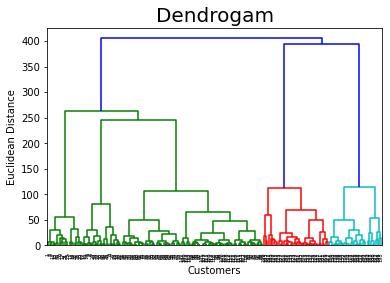

In [ ]:
# Plotting the Dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [2]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Agglomerative Clustering.ipynb')